<h1>Análisando algoritmos de ordenamiento</h1>

In [23]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

<h2>Problema de ordenamiento</h2>

Input:  $A[1..n] = <a_1,a_2\ldots, a_n>$

Output: $A'[1..n] = <a'_1,a'_2\ldots, a'_n> : a'_1\leq a'_2 \leq \ldots \leq  a'_n$

<h3> Ordenamiento por merge sort</h3>

In [24]:
def mergeSort(alist):
    if len(alist)>1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]

        mergeSort(lefthalf)
        mergeSort(righthalf)

        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] <= righthalf[j]:
                alist[k]=lefthalf[i]
                i=i+1
            else:
                alist[k]=righthalf[j]
                j=j+1
            k=k+1

        while i < len(lefthalf):
            alist[k]=lefthalf[i]
            i=i+1
            k=k+1

        while j < len(righthalf):
            alist[k]=righthalf[j]
            j=j+1
            k=k+1

In [25]:
B = np.random.permutation(range(0,10))
C = list(B)
print C
mergeSort(C)
print C

[3, 1, 4, 8, 5, 9, 0, 2, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


<h4>Correctitud</h4>

<b>Invariante:</b> Al final de cada llamado a la función, el subarreglo $A[0..k-1]$  consiste de los elementos originalmente en $A[0..k-1]$ pero ordenados.

In [26]:
def invariant(A, original_A):
    print "Ordenado", A
    print "Original ", original_A
    original_A.sort()
    print "comp ",A==original_A
    return A == original_A

In [27]:
print invariant([1, 2, 3, 4], [4, 3, 2, 1])
print invariant([1, 2, 3, 4], [5, 3, 2, 1])

Ordenado [1, 2, 3, 4]
Original  [4, 3, 2, 1]
comp  True
True
Ordenado [1, 2, 3, 4]
Original  [5, 3, 2, 1]
comp  False
False


Algoritmo de ordenamiento por merge sort incluyendo evaluación de la invariante (inicialización, mantenimiento, terminación)

In [28]:
def right_mergeSort(alist):
    original_A = list(alist)
    try:
        if len(alist)>1:
            mid = len(alist)//2
            lefthalf = alist[:mid]
            righthalf = alist[mid:]
            right_mergeSort(lefthalf)
            right_mergeSort(righthalf)
            i=0
            j=0
            k=0
            while i < len(lefthalf) and j < len(righthalf):
                if lefthalf[i] <= righthalf[j]:
                    alist[k]=lefthalf[i]
                    i=i+1
                else:
                    alist[k]=righthalf[j]
                    j=j+1
                k=k+1

            while i < len(lefthalf):
                alist[k]=lefthalf[i]
                i=i+1
                k=k+1

            while j < len(righthalf):
                alist[k]=righthalf[j]
                j=j+1
                k=k+1
            assert invariant(alist,original_A)
    except  AssertionError:
        print "Error en el invariante de ciclo!"
        print "Original A=", original_A
        print "otro", lefthalf+righthalf

In [29]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
C = list(B)
print C
right_mergeSort(C)
print C

[5, 4, 6, 3, 7, 2, 8, 1, 9]
Ordenado [4, 5]
Original  [5, 4]
comp  True
Ordenado [3, 6]
Original  [6, 3]
comp  True
Ordenado [3, 4, 5, 6]
Original  [5, 4, 6, 3]
comp  True
Ordenado [2, 7]
Original  [7, 2]
comp  True
Ordenado [1, 9]
Original  [1, 9]
comp  True
Ordenado [1, 8, 9]
Original  [8, 1, 9]
comp  True
Ordenado [1, 2, 7, 8, 9]
Original  [7, 2, 8, 1, 9]
comp  True
Ordenado [1, 2, 3, 4, 5, 6, 7, 8, 9]
Original  [5, 4, 6, 3, 7, 2, 8, 1, 9]
comp  True
[1, 2, 3, 4, 5, 6, 7, 8, 9]


<h4> Análisis del tiempo de ejecución</h4>

In [30]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps


        
def acct_mergeSort(alist, acct):
    if len(alist)>1:
        acct.count()
        mid = len(alist)//2;acct.count()
        lefthalf = alist[:mid];acct.count()
        righthalf = alist[mid:];acct.count()

        acct_mergeSort(lefthalf,acct);acct.count()
        acct_mergeSort(righthalf,acct);acct.count()

        i=0;acct.count()
        j=0;acct.count()
        k=0;acct.count()
        while i < len(lefthalf) and j < len(righthalf):
            acct.count()
            if lefthalf[i] <= righthalf[j]:
                acct.count()
                alist[k]=lefthalf[i];acct.count()
                i=i+1;acct.count()
            else:
                acct.count()
                alist[k]=righthalf[j];acct.count()
                j=j+1;acct.count()
            k=k+1;acct.count()
        acct.count()
        while i < len(lefthalf):
            acct.count()
            alist[k]=lefthalf[i];acct.count()
            i=i+1;acct.count()
            k=k+1;acct.count()
        acct.count()
        while j < len(righthalf):
            acct.count()
            alist[k]=righthalf[j];acct.count()
            j=j+1;acct.count()
            k=k+1;acct.count()
        acct.count()
    acct.count()

In [31]:
B = np.random.permutation(range(0,10))
C = list(B)
print C
acct = Counter()
acct_mergeSort(C, acct)
acct.print_steps()

[1, 2, 7, 9, 8, 5, 0, 6, 4, 3]
Number of steps = 283


<h4>Análisis experimental</h4>
Ahora vamos a analizar el comportamiento del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función acct_insertion_sort(l, acct) y contabiliza el número de pasos.

In [32]:
import random as rnd

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        C =list(l)
        acct.reset()
        acct_mergeSort(C, acct)
        results.append(acct.steps)
    return results

In [33]:
print exper_analysis(10)

[1, 1, 24, 51, 80, 111, 146, 177, 212, 250]


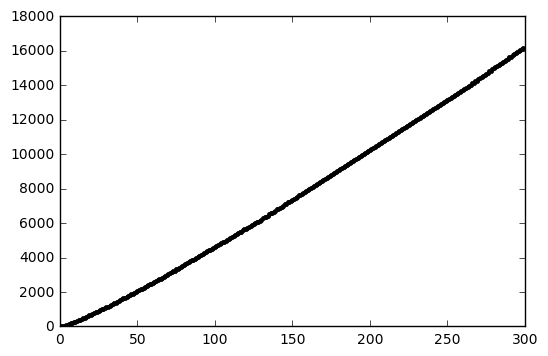

In [35]:
pl.clf()
x = np.arange(300)
y = np.array(exper_analysis(300))
pl.plot(x, y, 'k.')

<p>Tiempo de ejecucion</p>

In [16]:
import random as rnd
import time
def exper_analysis2(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        C =list(l)
        tic = time.clock()
        mergeSort(C)
        toc = time.clock()
        results.append((toc-tic)*1000000)
    return results


In [17]:
print exper_analysis2(10)

[1.3242901970080312, 0.3310725492520071, 3.3107254925200773, 5.297160788032123, 7.283596083544169, 9.601103928308225, 11.587539223820267, 14.236119617836325, 16.55362746260038, 19.202207856616464]


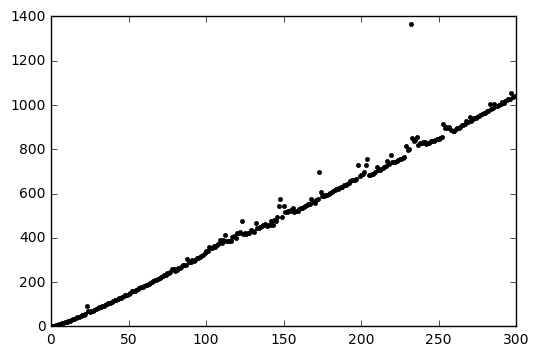

In [18]:
pl.clf()
x = np.arange(300)
y = np.array(exper_analysis2(300))
pl.plot(x, y, 'k.')

<p>Tiempo de teorico</p>

In [19]:
def exper_analysis3(n):
    results = []
    acct = Counter()
    for i in range(n):
        l=0
        if i > 1:
            l = i * math.log(i,2)
        results.append(l)
    return results

In [20]:
print exper_analysis3(20)

[0, 0, 2.0, 4.754887502163469, 8.0, 11.60964047443681, 15.509775004326936, 19.651484454403228, 24.0, 28.529325012980813, 33.219280948873624, 38.053747805010275, 43.01955000865388, 48.105716335834195, 53.30296890880645, 58.60335893412778, 64.0, 69.48686830125578, 75.05865002596161, 80.71062275542812]


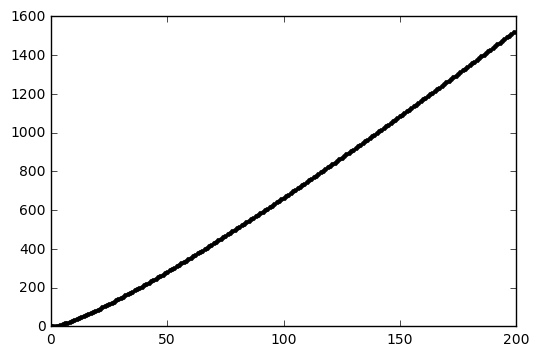

In [21]:
pl.clf()
x = np.arange(200)
y = np.array(exper_analysis3(200))
pl.plot(x, y, 'k.')

<H2>Numero de operaciones, tiempo de ejecucion y tiempo teórico</H2>

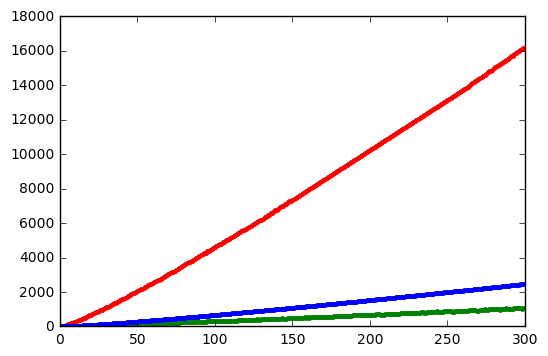

In [22]:
pl.clf()
x = np.arange(300)
y = np.array(exper_analysis(300))
pl.plot(x, y, 'k.',color='red')  #De color rojo el número de operaciones
y = np.array(exper_analysis2(300))
pl.plot(x, y, 'k.',color='green') #En verde el tiempo de ejecución multiplicado por 1'000.000
y = np.array(exper_analysis3(300))
pl.plot(x, y, 'k.',color='blue') #En azul T(n)